<a href="https://colab.research.google.com/github/karlmel/Artifical-Neural-Netwoks-Prediction-of-Energy-Use/blob/main/ENERJI_TAHMINI_ARTICLE_End.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.models import Sequential
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_excel('TUM_BEBTR_YAPIMSISTMLI.xlsx', index_col='BINAKODU')
df

,TOPLAM_INS,KOMPAKTLIK,EN_BOY,TABANALANI,bitisik,Brlsk_Oran,BITISIKENR,ZEMINUSTUK,TUM_KAT,YAPI_SISTE,YIL,Enerji_Ala,ENERJI
BINAKODU,,,,,,,,,,,,,
100014885,285.266497,0.866872,0.819327,142.6330,0.0,0,0.0,2,2,4,3,153.454007,3.257984e+04
100018845,386.058753,1.019046,0.617805,77.2118,0.0,0,0.0,4,5,4,4,112.109192,6.715705e+04
100041011,998.000227,0.716408,0.659070,166.3330,0.0,0,0.0,4,6,4,2,144.903769,1.007877e+05
100072172,768.267803,0.818591,0.562516,128.0450,0.0,0,0.0,4,6,4,3,164.651479,1.361750e+05
100079979,568.070136,0.860113,0.561321,113.6140,0.0,0,0.0,4,5,4,4,150.490824,3.510917e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...
779535822,941.629643,0.674348,0.713099,188.3260,0.0,0,0.0,4,5,4,4,130.253538,7.324858e+04
779546993,567.472905,0.863998,0.563616,113.4950,0.0,0,0.0,4,5,4,4,127.282483,5.316563e+04
779870674,650.659028,0.791030,0.750360,130.1320,0.0,0,0.0,4,5,4,4,131.115430,7.125337e+04


In [ ]:
#YAPI_SISTEM değişkenini dışarıda tutalım
df = df.drop(["Enerji_Ala","YIL", "YAPI_SISTE", "bitisik", "BITISIKENR", "ZEMINUSTUK", "TUM_KAT"], axis = 1).astype("float64")
df

,TOPLAM_INS,KOMPAKTLIK,EN_BOY,TABANALANI,Brlsk_Oran,ENERJI
BINAKODU,,,,,,
100014885,285.266497,0.866872,0.819327,142.6330,0.0,3.257984e+04
100018845,386.058753,1.019046,0.617805,77.2118,0.0,6.715705e+04
100041011,998.000227,0.716408,0.659070,166.3330,0.0,1.007877e+05
100072172,768.267803,0.818591,0.562516,128.0450,0.0,1.361750e+05
100079979,568.070136,0.860113,0.561321,113.6140,0.0,3.510917e+04
...,...,...,...,...,...,...
779535822,941.629643,0.674348,0.713099,188.3260,0.0,7.324858e+04
779546993,567.472905,0.863998,0.563616,113.4950,0.0,5.316563e+04
779870674,650.659028,0.791030,0.750360,130.1320,0.0,7.125337e+04


In [ ]:
#outlierları hesaplamak için pyod import edilmeli
!pip install pyod

In [ ]:
# Outlierları tespit edelim

from pyod.models.ecod import ECOD

clf = ECOD()
clf.fit(df)
outliers = clf.predict(df)

df["outliers"] = outliers

# Outliersız data
df_no_outliers = df[df["outliers"] == 0]
df_no_outliers = df_no_outliers.drop(["outliers"], axis = 1)

# Outlierlı data
df_with_outliers = df.copy()
df_with_outliers = df_with_outliers.drop(["outliers"], axis = 1)

print(df_no_outliers.shape)
print(df_with_outliers.shape)

(36905, 6)
(41006, 6)


In [ ]:
df=df_no_outliers

In [ ]:
# 'TOPLAM_INS' sütununu kullanarak verileri sırala (büyükten küçüğe)
df = df.sort_values(by='ENERJI', ascending=False)

# En büyük üç değeri seç
en_buyuk_uc = df.head(14)

# En büyük üç değeri içermeyen yeni bir DataFrame oluştur
df = df.drop(en_buyuk_uc.index)

In [ ]:
X = df.drop('ENERJI',axis=1).values
y = df['ENERJI'].values

In [ ]:
y=np.log(y)

In [ ]:
# NumPy dizisini Pandas Series'e dönüştürme
y_series = pd.Series(y)

# y_series'in describe() fonksiyonunu kullanarak istatistiksel özetini alın
y_series.describe()

count    36891.000000
mean        11.601937
std          0.806192
min          8.994215
25%         11.025889
50%         11.591737
75%         12.199116
max         14.258525
dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=42)

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(20, activation='relu', input_shape=(5,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))

custom_optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=custom_optimizer, loss='mse')

In [ ]:
from keras.utils import plot_model

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=600,  batch_size=128, callbacks=[early_stop])

Epoch 1/600
202/202 [==============================] - 3s 6ms/step - loss: 14.2991 - val_loss: 0.5461
Epoch 2/600
202/202 [==============================] - 1s 4ms/step - loss: 0.4365 - val_loss: 0.3460
Epoch 3/600
202/202 [==============================] - 1s 3ms/step - loss: 0.3059 - val_loss: 0.2660
Epoch 4/600
202/202 [==============================] - 1s 3ms/step - loss: 0.2511 - val_loss: 0.2320
Epoch 5/600
202/202 [==============================] - 1s 5ms/step - loss: 0.2365 - val_loss: 0.2319
Epoch 6/600
202/202 [==============================] - 1s 5ms/step - loss: 0.2321 - val_loss: 0.2422
Epoch 7/600
202/202 [==============================] - 1s 5ms/step - loss: 0.2309 - val_loss: 0.2244
Epoch 8/600
202/202 [==============================] - 1s 6ms/step - loss: 0.2311 - val_loss: 0.2258
Epoch 9/600
202/202 [==============================] - 1s 6ms/step - loss: 0.2350 - val_loss: 0.2242
Epoch 10/600
202/202 [==============================] - 1s 6ms/step - loss: 0.2312 - val_l

In [ ]:
predictions = model.predict(X_test)

346/346 [==============================] - 1s 1ms/step


In [ ]:
import numpy as np
np.sqrt(mean_squared_error(y_test,predictions))

0.415139573122014

In [ ]:
mean_absolute_error(y_test,predictions)

0.30596854782232513

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score
explained_variance_score(y_test,predictions)

0.7380560009829003

In [ ]:
egitim_tahmin = model.predict(X_train)

807/807 [==============================] - 1s 1ms/step


In [ ]:
egitim_tahmin.shape

(25823, 1)

In [ ]:
np.sqrt(mean_squared_error(y_train,egitim_tahmin))

0.4111248188505258

In [ ]:
mean_absolute_error(y_train,egitim_tahmin)

0.3038530397144629

In [ ]:
explained_variance_score(y_train,egitim_tahmin)

0.7401957775926644

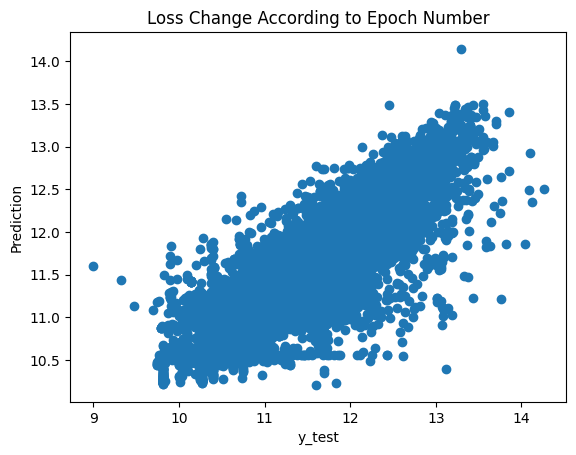

In [ ]:
plt.scatter(y_test,predictions)
plt.xlabel('y_test')
plt.ylabel('Prediction')
plt.title('Loss Change According to Epoch Number')


# Grafiği PNG olarak kaydetme
plt.savefig('ANN_scatter.png', format='png')

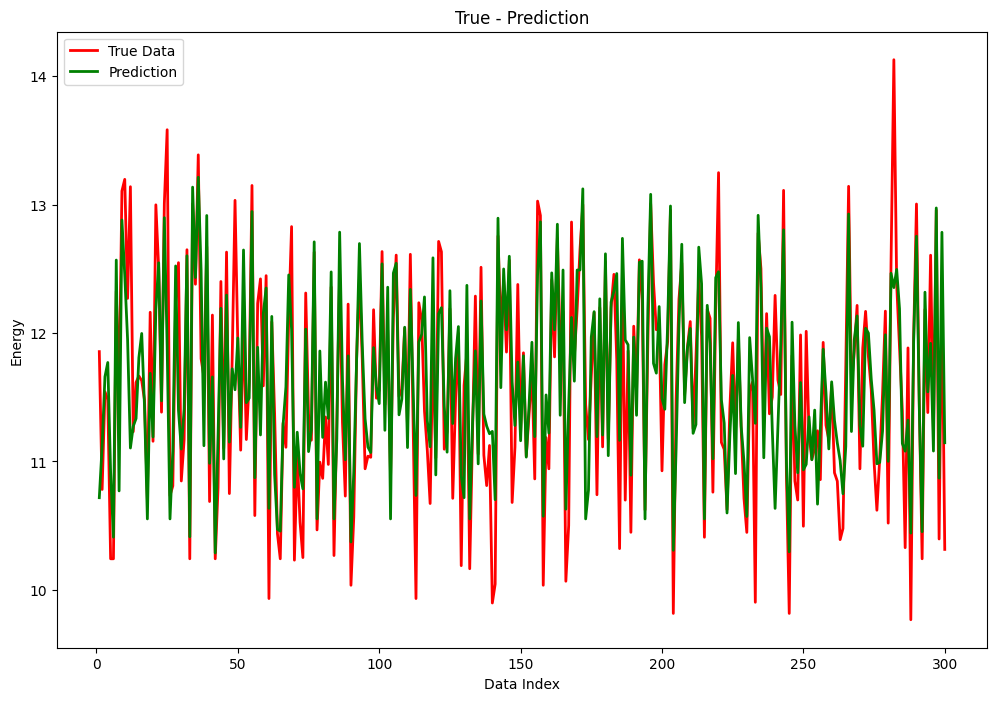

In [ ]:
import matplotlib.pyplot as plt
# İlk 120 veriyi seç
indexler = range(1, 301)

# Gerçek Data -> Grand Truth
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(indexler, y_test[:300], label='True Data', color='red', linewidth=2)

# Tahmin -> Prediction
ax.plot(indexler, predictions [:300], label='Prediction', color='green', linewidth=2)

plt.savefig('True-Pred.png', format='png')

plt.title('True - Prediction')
plt.xlabel('Data Index')
plt.ylabel('Energy')
plt.legend(loc='upper left')
plt.show()

In [ ]:
pip install shap==0.42.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.1/547.1 kB 6.8 MB/s eta 0:00:00


In [ ]:
import shap
X_sub = shap.sample(X_train, 100)
explainer = shap.Explainer(model.predict, X_sub)
shap_values = explainer(X_test[:100])

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


100/100 [==============================] - 0s 3ms/step


Exact explainer:   1%|          | 1/100 [00:00<?, ?it/s]

19/19 [==============================] - 0s 9ms/step


Exact explainer:   3%|▎         | 3/100 [00:11<00:42,  2.27it/s]

19/19 [==============================] - 0s 2ms/step


Exact explainer:   4%|▍         | 4/100 [00:12<01:10,  1.35it/s]

19/19 [==============================] - 0s 4ms/step


Exact explainer:   5%|▌         | 5/100 [00:13<01:07,  1.40it/s]

19/19 [==============================] - 0s 4ms/step


Exact explainer:   6%|▌         | 6/100 [00:14<01:12,  1.30it/s]

19/19 [==============================] - 0s 9ms/step


Exact explainer:   7%|▋         | 7/100 [00:15<01:16,  1.22it/s]

19/19 [==============================] - 0s 5ms/step


Exact explainer:   8%|▊         | 8/100 [00:17<01:50,  1.20s/it]

19/19 [==============================] - 0s 2ms/step


Exact explainer:   9%|▉         | 9/100 [00:18<01:31,  1.00s/it]

19/19 [==============================] - 0s 2ms/step


Exact explainer:  10%|█         | 10/100 [00:18<01:17,  1.15it/s]

19/19 [==============================] - 0s 2ms/step


Exact explainer:  11%|█         | 11/100 [00:18<01:01,  1.44it/s]

19/19 [==============================] - 0s 3ms/step


Exact explainer:  12%|█▏        | 12/100 [00:19<00:51,  1.70it/s]

19/19 [==============================] - 0s 2ms/step


Exact explainer:  13%|█▎        | 13/100 [00:19<00:50,  1.72it/s]

19/19 [==============================] - 0s 2ms/step


Exact explainer:  14%|█▍        | 14/100 [00:20<00:49,  1.75it/s]

19/19 [==============================] - 0s 2ms/step


Exact explainer:  15%|█▌        | 15/100 [00:20<00:48,  1.74it/s]

19/19 [==============================] - 0s 1ms/step


Exact explainer:  16%|█▌        | 16/100 [00:21<00:47,  1.78it/s]

19/19 [==============================] - 0s 1ms/step


Exact explainer:  17%|█▋        | 17/100 [00:21<00:39,  2.08it/s]

19/19 [==============================] - 0s 1ms/step


Exact explainer:  18%|█▊        | 18/100 [00:22<00:35,  2.34it/s]

19/19 [==============================] - 0s 2ms/step


Exact explainer:  19%|█▉        | 19/100 [00:22<00:32,  2.52it/s]

19/19 [==============================] - 0s 2ms/step


Exact explainer:  20%|██        | 20/100 [00:22<00:29,  2.70it/s]

19/19 [==============================] - 0s 2ms/step


Exact explainer:  21%|██        | 21/100 [00:22<00:26,  2.93it/s]

19/19 [==============================] - 0s 2ms/step


Exact explainer:  22%|██▏       | 22/100 [00:23<00:27,  2.86it/s]

19/19 [==============================] - 0s 2ms/step


Exact explainer:  23%|██▎       | 23/100 [00:23<00:26,  2.87it/s]

19/19 [==============================] - 0s 2ms/step


Exact explainer:  24%|██▍       | 24/100 [00:23<00:25,  3.00it/s]

19/19 [==============================] - 0s 2ms/step


Exact explainer:  25%|██▌       | 25/100 [00:24<00:24,  3.11it/s]

19/19 [==============================] - 0s 2ms/step


Exact explainer:  26%|██▌       | 26/100 [00:24<00:23,  3.16it/s]

19/19 [==============================] - 0s 1ms/step


Exact explainer:  27%|██▋       | 27/100 [00:24<00:23,  3.09it/s]

19/19 [==============================] - 0s 2ms/step


Exact explainer:  28%|██▊       | 28/100 [00:25<00:22,  3.15it/s]

19/19 [==============================] - 0s 2ms/step


Exact explainer:  29%|██▉       | 29/100 [00:25<00:23,  3.08it/s]

19/19 [==============================] - 0s 2ms/step


Exact explainer:  30%|███       | 30/100 [00:25<00:23,  3.03it/s]

19/19 [==============================] - 0s 1ms/step


Exact explainer:  31%|███       | 31/100 [00:26<00:21,  3.14it/s]

19/19 [==============================] - 0s 2ms/step


Exact explainer:  32%|███▏      | 32/100 [00:26<00:22,  3.08it/s]

19/19 [==============================] - 0s 2ms/step


Exact explainer:  33%|███▎      | 33/100 [00:26<00:21,  3.09it/s]

19/19 [==============================] - 0s 1ms/step


Exact explainer:  34%|███▍      | 34/100 [00:27<00:20,  3.27it/s]

19/19 [==============================] - 0s 1ms/step


Exact explainer:  35%|███▌      | 35/100 [00:27<00:19,  3.27it/s]

19/19 [==============================] - 0s 2ms/step


Exact explainer:  36%|███▌      | 36/100 [00:27<00:20,  3.20it/s]

19/19 [==============================] - 0s 1ms/step


Exact explainer:  37%|███▋      | 37/100 [00:28<00:19,  3.30it/s]

19/19 [==============================] - 0s 2ms/step


Exact explainer:  38%|███▊      | 38/100 [00:28<00:19,  3.18it/s]

19/19 [==============================] - 0s 1ms/step


Exact explainer:  39%|███▉      | 39/100 [00:28<00:18,  3.30it/s]

19/19 [==============================] - 0s 2ms/step


Exact explainer:  40%|████      | 40/100 [00:28<00:18,  3.28it/s]

19/19 [==============================] - 0s 2ms/step


Exact explainer:  41%|████      | 41/100 [00:29<00:18,  3.16it/s]

19/19 [==============================] - 0s 1ms/step


Exact explainer:  42%|████▏     | 42/100 [00:29<00:18,  3.11it/s]

19/19 [==============================] - 0s 1ms/step


Exact explainer:  43%|████▎     | 43/100 [00:29<00:18,  3.02it/s]

19/19 [==============================] - 0s 1ms/step


Exact explainer:  44%|████▍     | 44/100 [00:30<00:17,  3.16it/s]

19/19 [==============================] - 0s 2ms/step


Exact explainer:  45%|████▌     | 45/100 [00:30<00:17,  3.06it/s]

19/19 [==============================] - 0s 2ms/step


Exact explainer:  46%|████▌     | 46/100 [00:30<00:17,  3.02it/s]

19/19 [==============================] - 0s 2ms/step


Exact explainer:  47%|████▋     | 47/100 [00:31<00:17,  3.01it/s]

19/19 [==============================] - 0s 2ms/step


Exact explainer:  48%|████▊     | 48/100 [00:31<00:21,  2.47it/s]

19/19 [==============================] - 0s 2ms/step


Exact explainer:  49%|████▉     | 49/100 [00:32<00:20,  2.49it/s]

19/19 [==============================] - 0s 3ms/step


Exact explainer:  50%|█████     | 50/100 [00:32<00:23,  2.11it/s]

19/19 [==============================] - 0s 2ms/step


Exact explainer:  51%|█████     | 51/100 [00:33<00:21,  2.23it/s]

19/19 [==============================] - 0s 2ms/step


Exact explainer:  52%|█████▏    | 52/100 [00:33<00:20,  2.29it/s]

19/19 [==============================] - 0s 2ms/step


Exact explainer:  53%|█████▎    | 53/100 [00:34<00:19,  2.46it/s]

19/19 [==============================] - 0s 2ms/step


Exact explainer:  54%|█████▍    | 54/100 [00:34<00:17,  2.66it/s]

19/19 [==============================] - 0s 2ms/step


Exact explainer:  55%|█████▌    | 55/100 [00:34<00:15,  2.87it/s]

19/19 [==============================] - 0s 2ms/step


Exact explainer:  56%|█████▌    | 56/100 [00:34<00:15,  2.86it/s]

19/19 [==============================] - 0s 2ms/step


Exact explainer:  57%|█████▋    | 57/100 [00:35<00:16,  2.57it/s]

19/19 [==============================] - 0s 2ms/step


Exact explainer:  58%|█████▊    | 58/100 [00:35<00:16,  2.60it/s]

19/19 [==============================] - 0s 3ms/step


Exact explainer:  59%|█████▉    | 59/100 [00:36<00:19,  2.05it/s]

19/19 [==============================] - 0s 3ms/step


Exact explainer:  60%|██████    | 60/100 [00:37<00:25,  1.55it/s]

19/19 [==============================] - 0s 2ms/step


Exact explainer:  61%|██████    | 61/100 [00:38<00:25,  1.54it/s]

19/19 [==============================] - 0s 5ms/step


Exact explainer:  62%|██████▏   | 62/100 [00:38<00:24,  1.53it/s]

19/19 [==============================] - 0s 5ms/step


Exact explainer:  63%|██████▎   | 63/100 [00:39<00:23,  1.57it/s]

19/19 [==============================] - 0s 2ms/step


Exact explainer:  64%|██████▍   | 64/100 [00:40<00:26,  1.35it/s]

19/19 [==============================] - 0s 4ms/step


Exact explainer:  65%|██████▌   | 65/100 [00:41<00:25,  1.38it/s]

19/19 [==============================] - 0s 3ms/step


Exact explainer:  66%|██████▌   | 66/100 [00:41<00:25,  1.36it/s]

19/19 [==============================] - 0s 2ms/step


Exact explainer:  67%|██████▋   | 67/100 [00:42<00:23,  1.38it/s]

19/19 [==============================] - 0s 2ms/step


Exact explainer:  68%|██████▊   | 68/100 [00:43<00:22,  1.40it/s]

19/19 [==============================] - 0s 5ms/step


Exact explainer:  69%|██████▉   | 69/100 [00:44<00:22,  1.38it/s]

19/19 [==============================] - 0s 8ms/step


Exact explainer:  70%|███████   | 70/100 [00:45<00:30,  1.01s/it]

19/19 [==============================] - 0s 7ms/step


Exact explainer:  71%|███████   | 71/100 [00:46<00:28,  1.00it/s]

19/19 [==============================] - 0s 10ms/step


Exact explainer:  72%|███████▏  | 72/100 [00:47<00:29,  1.04s/it]

19/19 [==============================] - 0s 5ms/step


Exact explainer:  73%|███████▎  | 73/100 [00:48<00:27,  1.03s/it]

19/19 [==============================] - 0s 5ms/step


Exact explainer:  74%|███████▍  | 74/100 [00:50<00:28,  1.11s/it]

19/19 [==============================] - 0s 4ms/step


Exact explainer:  75%|███████▌  | 75/100 [00:50<00:24,  1.01it/s]

19/19 [==============================] - 0s 2ms/step


Exact explainer:  76%|███████▌  | 76/100 [00:51<00:21,  1.10it/s]

19/19 [==============================] - 0s 5ms/step


Exact explainer:  77%|███████▋  | 77/100 [00:52<00:20,  1.10it/s]

19/19 [==============================] - 0s 5ms/step


Exact explainer:  78%|███████▊  | 78/100 [00:53<00:18,  1.18it/s]

19/19 [==============================] - 0s 3ms/step


Exact explainer:  79%|███████▉  | 79/100 [00:53<00:16,  1.25it/s]

19/19 [==============================] - 0s 2ms/step


Exact explainer:  80%|████████  | 80/100 [00:54<00:15,  1.27it/s]

19/19 [==============================] - 0s 6ms/step


Exact explainer:  81%|████████  | 81/100 [00:55<00:17,  1.10it/s]

19/19 [==============================] - 0s 2ms/step


Exact explainer:  82%|████████▏ | 82/100 [00:56<00:15,  1.19it/s]

19/19 [==============================] - 0s 10ms/step


Exact explainer:  83%|████████▎ | 83/100 [00:57<00:16,  1.00it/s]

19/19 [==============================] - 0s 5ms/step


Exact explainer:  84%|████████▍ | 84/100 [00:59<00:17,  1.10s/it]

19/19 [==============================] - 0s 7ms/step


Exact explainer:  85%|████████▌ | 85/100 [01:00<00:17,  1.19s/it]

19/19 [==============================] - 0s 7ms/step


Exact explainer:  86%|████████▌ | 86/100 [01:01<00:17,  1.25s/it]

19/19 [==============================] - 0s 2ms/step


Exact explainer:  87%|████████▋ | 87/100 [01:02<00:14,  1.12s/it]

19/19 [==============================] - 0s 2ms/step


Exact explainer:  88%|████████▊ | 88/100 [01:03<00:11,  1.01it/s]

19/19 [==============================] - 0s 3ms/step


Exact explainer:  89%|████████▉ | 89/100 [01:04<00:10,  1.01it/s]

19/19 [==============================] - 0s 5ms/step


Exact explainer:  90%|█████████ | 90/100 [01:05<00:09,  1.03it/s]

19/19 [==============================] - 0s 2ms/step


Exact explainer:  91%|█████████ | 91/100 [01:05<00:07,  1.25it/s]

19/19 [==============================] - 0s 1ms/step


Exact explainer:  92%|█████████▏| 92/100 [01:06<00:05,  1.51it/s]

19/19 [==============================] - 0s 2ms/step


Exact explainer:  93%|█████████▎| 93/100 [01:06<00:03,  1.77it/s]

19/19 [==============================] - 0s 1ms/step


Exact explainer:  94%|█████████▍| 94/100 [01:06<00:02,  2.02it/s]

19/19 [==============================] - 0s 1ms/step


Exact explainer:  95%|█████████▌| 95/100 [01:07<00:02,  2.22it/s]

19/19 [==============================] - 0s 2ms/step


Exact explainer:  96%|█████████▌| 96/100 [01:07<00:01,  2.40it/s]

19/19 [==============================] - 0s 1ms/step


Exact explainer:  97%|█████████▋| 97/100 [01:07<00:01,  2.67it/s]

19/19 [==============================] - 0s 2ms/step


Exact explainer:  98%|█████████▊| 98/100 [01:08<00:00,  2.84it/s]

19/19 [==============================] - 0s 2ms/step


Exact explainer:  99%|█████████▉| 99/100 [01:08<00:00,  3.00it/s]

19/19 [==============================] - 0s 2ms/step


Exact explainer: 100%|██████████| 100/100 [01:08<00:00,  3.11it/s]

19/19 [==============================] - 0s 2ms/step


Exact explainer: 101it [01:09,  1.45it/s]


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


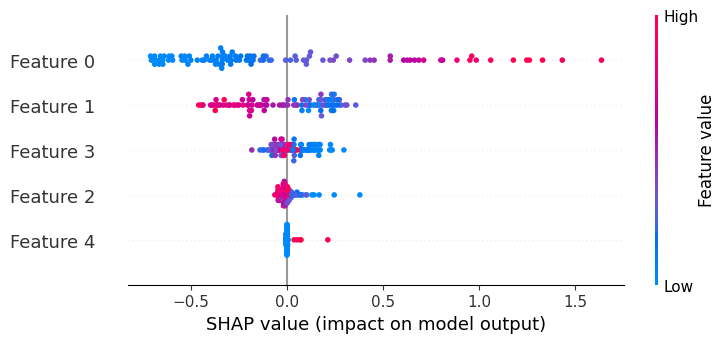

<Figure size 640x480 with 0 Axes>

In [ ]:
shap.plots.beeswarm(shap_values)

plt.savefig('shap_values_beeswarm.png', format='png')

plt.show()

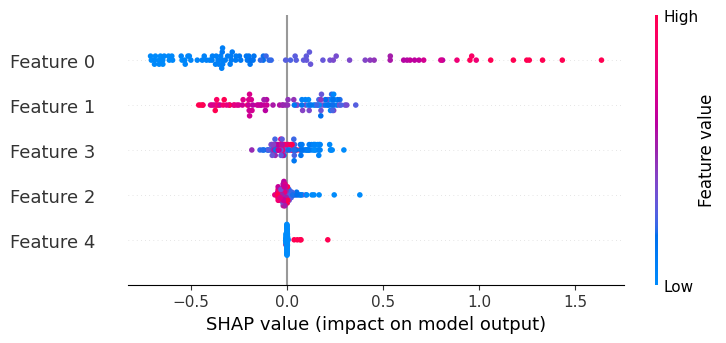

<Figure size 640x480 with 0 Axes>

In [ ]:
# SHAP değerlerini görselleştirin
shap.plots.beeswarm(shap_values)

# Görseli kaydedin
plt.savefig('shap_values_beeswarm.png', format='png')

# Görseli gösterin (isteğe bağlı)
plt.show()

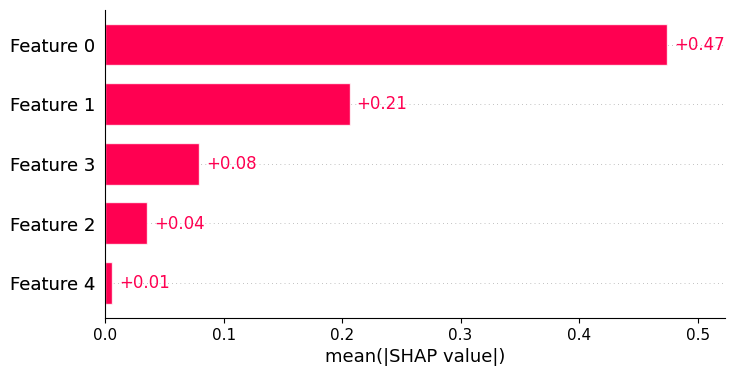

<Figure size 640x480 with 0 Axes>

In [ ]:
shap.plots.bar(shap_values)
plt.savefig('bar.png', format='png')

In [ ]:
df_bebtrsiz=pd.read_excel('BEBTRSIZ2.xlsx', index_col='BINAKODU')
df_bebtrsiz

,IBB_KIMLIK,ZEMINUSTUK,TOPLAM_KAT,TOPLAM_INS,KOMPAKTLIK,EN_BOY,TABANALANI,bitisik,BITISIKENR,Brlsk_Oran,YAPI_CEVRE
BINAKODU,,,,,,,,,,,
100000041,120138421,8,9,1573.382834,0.655674,0.703872,174.820315,0.000000,0.000000,0.000000,53.670466
100000371,529048347,4,5,403.567984,0.979796,0.792093,80.713597,0.000000,0.000000,0.000000,36.178369
100000587,665293743,2,2,170.308782,1.069716,0.728023,85.154391,6.613662,0.172010,17.200992,38.449304
100001148,133001527,5,6,584.176419,0.918030,0.669065,97.362737,0.000000,0.000000,0.000000,41.445534
100001387,135026566,1,1,52.742200,1.448471,0.718601,52.742200,0.000000,0.000000,0.000000,29.407404
...,...,...,...,...,...,...,...,...,...,...,...
779858547,529051845,8,9,5096.726824,0.396104,0.512213,566.302980,0.000000,0.000000,0.000000,100.359513
779895754,665116350,5,6,684.118514,0.896348,0.462027,114.019752,0.000000,0.000000,0.000000,47.300030
779931112,665269014,1,1,86.478102,1.200774,0.756405,86.478102,0.000000,0.000000,0.000000,37.507310


In [ ]:
#YAPI_SISTEM değişkenini dışarıda tutalım
df_bebtrsiz = df_bebtrsiz.drop(["IBB_KIMLIK","ZEMINUSTUK", "TOPLAM_KAT", "bitisik", "BITISIKENR", "YAPI_CEVRE"], axis = 1).astype("float64")
df_bebtrsiz

,TOPLAM_INS,KOMPAKTLIK,EN_BOY,TABANALANI,Brlsk_Oran
BINAKODU,,,,,
100000041,1573.382834,0.655674,0.703872,174.820315,0.000000
100000371,403.567984,0.979796,0.792093,80.713597,0.000000
100000587,170.308782,1.069716,0.728023,85.154391,17.200992
100001148,584.176419,0.918030,0.669065,97.362737,0.000000
100001387,52.742200,1.448471,0.718601,52.742200,0.000000
...,...,...,...,...,...
779858547,5096.726824,0.396104,0.512213,566.302980,0.000000
779895754,684.118514,0.896348,0.462027,114.019752,0.000000
779931112,86.478102,1.200774,0.756405,86.478102,0.000000


In [ ]:
# Min-max scaler'ı tanımla
scaler = MinMaxScaler()

# Ölçekleyiciyi eğitin
scaler.fit(df_bebtrsiz)

# Veri setini ölçekle
df_bebtrsiz_scaled = scaler.transform(df_bebtrsiz)

In [ ]:
df_bebtrsiz_scaled = pd.DataFrame(df_bebtrsiz_scaled, columns=df_bebtrsiz.columns, index=df_bebtrsiz.index)

In [ ]:
enerji_tahmin= model.predict(df_bebtrsiz_scaled )

22302/22302 [==============================] - 47s 2ms/step


In [ ]:
np.exp(enerji_tahmin)

array([[193447.2 ],
       [171126.22],
       [160785.19],
       ...,
       [158480.03],
       [215563.45],
       [150074.94]], dtype=float32)

In [ ]:
#Tahmin edilen değerlerle DataFrame oluştur
enerji_tahmin_df = pd.DataFrame(np.exp(enerji_tahmin), columns=["ENERJI"], index=df_bebtrsiz.index)

# DataFrame'i yeniden oluştururken indeksi tekrar ekleyin
print(enerji_tahmin_df)

                  ENERJI
BINAKODU                
100000041  193447.203125
100000371  171126.218750
100000587  160785.187500
100001148  178647.562500
100001387  143766.265625
...                  ...
779858547  213403.468750
779895754  198723.140625
779931112  158480.031250
779940709  215563.453125
779988328  150074.937500

[713648 rows x 1 columns]


In [ ]:
enerji_tahmin_df.to_excel('ENERJI_TAHMIN_YAPIMSISTEMLI3.xlsx')

In [ ]:
enerji_tahmin_df.to_csv('ENERJI_TAHMIN_YAPIMSISTEMLI2.csv')

In [ ]:
X_train_first_10 = X_train[:10]
X_train_first_10

array([[0.08726787, 0.37430746, 0.66626269, 0.06944149, 0.        ],
       [0.12353372, 0.19302552, 0.75795283, 0.13402709, 0.        ],
       [0.03576289, 0.47514648, 0.33814838, 0.03938314, 0.43939394],
       [0.02418993, 0.57461279, 0.64525655, 0.03851643, 0.        ],
       [0.03588675, 0.47778213, 0.40996217, 0.03957412, 0.        ],
       [0.2401658 , 0.19463213, 0.19879752, 0.19021403, 0.        ],
       [0.10409219, 0.29840376, 0.718769  , 0.07015226, 0.        ],
       [0.04519477, 0.38295244, 0.84896285, 0.05394663, 0.        ],
       [0.37878588, 0.14354759, 0.54318767, 0.14151312, 0.        ],
       [0.05923977, 0.35364088, 0.64881781, 0.05460723, 0.        ]])

In [ ]:
enerji_tahmin_YENİ= model.predict(X_train_first_10)
enerji_tahmin_YENİ

1/1 [==============================] - 0s 28ms/step


array([[11.3535595],
       [11.745943 ],
       [11.116657 ],
       [10.650715 ],
       [10.940242 ],
       [12.171573 ],
       [11.620218 ],
       [11.015587 ],
       [12.666957 ],
       [11.29735  ]], dtype=float32)

In [ ]:
np.exp(enerji_tahmin_YENİ)

array([[ 85268.42 ],
       [126240.37 ],
       [ 67282.625],
       [ 42222.766],
       [ 56400.98 ],
       [193217.66 ],
       [111326.02 ],
       [ 60814.703],
       [317095.06 ],
       [ 80607.74 ]], dtype=float32)

In [ ]:
 y_train[:10]

array([10.45917829, 11.70026604, 10.9845727 , 10.99963286, 10.32199665,
       12.18458168, 11.56490465, 10.90286864, 12.42385025, 11.11105926])

In [ ]:
np.exp(y_train[:10])

array([ 34862.89248, 120603.7959 ,  58957.53405,  59852.16352,
        30393.88304, 195747.6647 , 105335.3814 ,  54331.99967,
       248662.1064 ,  66907.02584])